In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


# Data set

# Data set


In [ ]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain","snow", "functional" ]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis = 1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity,Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df.columns= dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


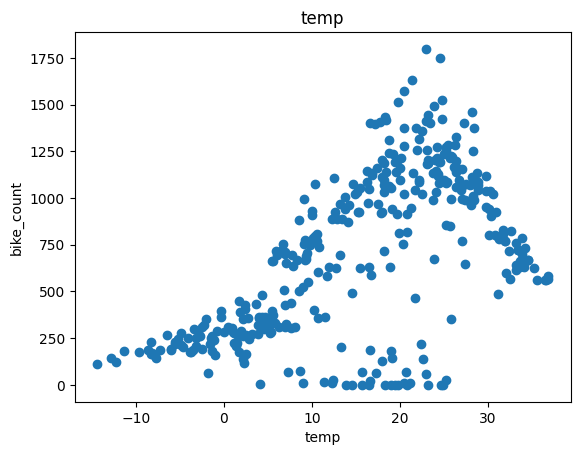

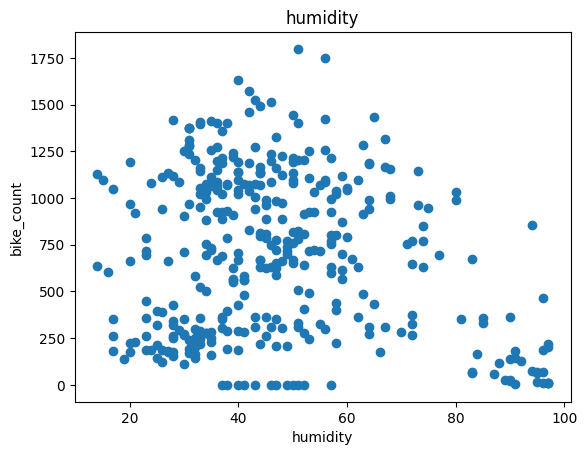

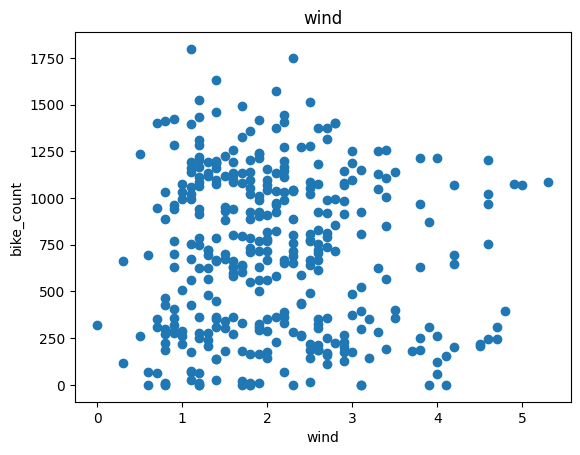

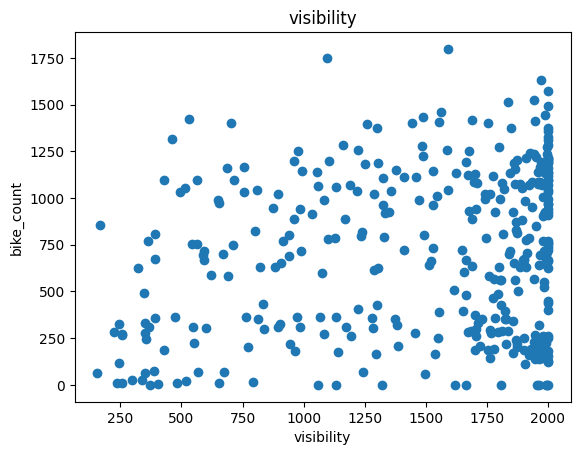

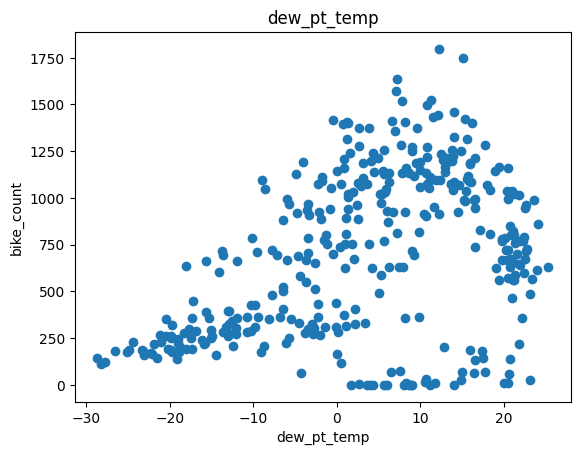

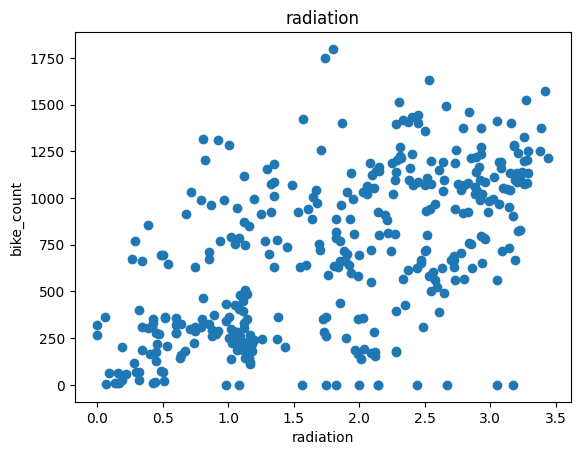

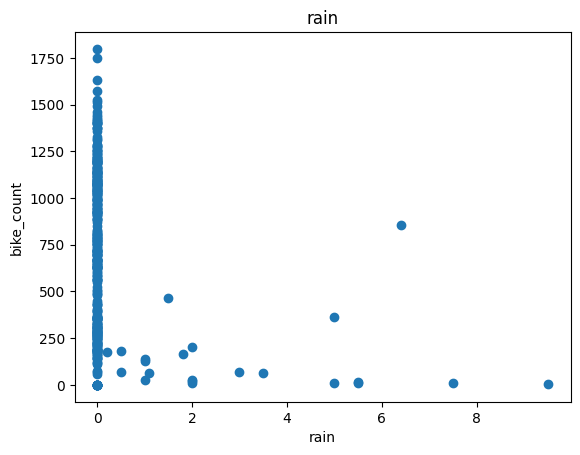

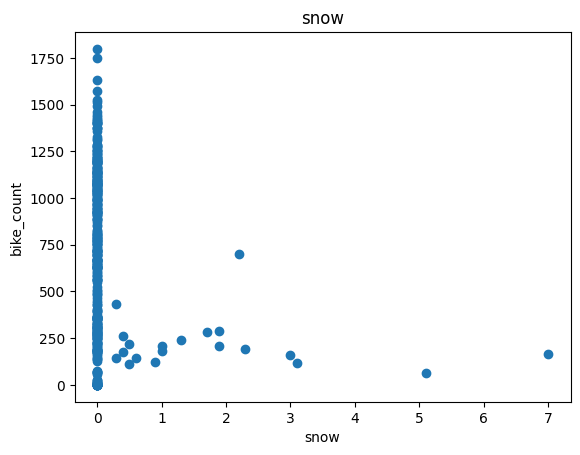

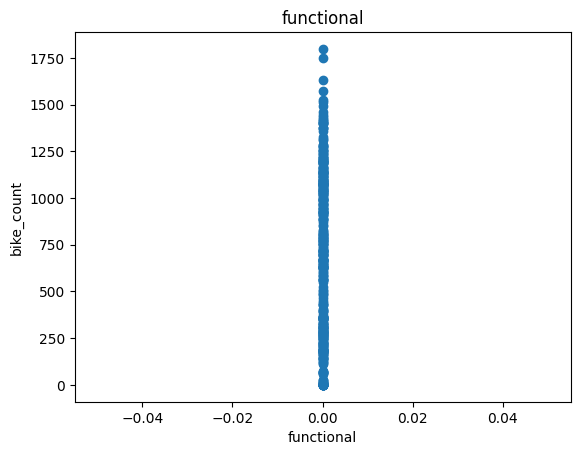

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike_count")
  plt.xlabel(label)
  plt.show()



In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test dataset

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df)) ])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
      if len(x_labels) ==1:
        X = dataframe[x_labels[0]].values.reshape(-1, 1)
      else:
        X = dataframe[x_labels].values

      y = dataframe[y_label].values.reshape(-1, 1)
      data = np.hstack((X, y))
      return data, X, y

In [ ]:
_, X_train_temp, y_train_temp = get_xy(df, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(df, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(df, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.330867186499053

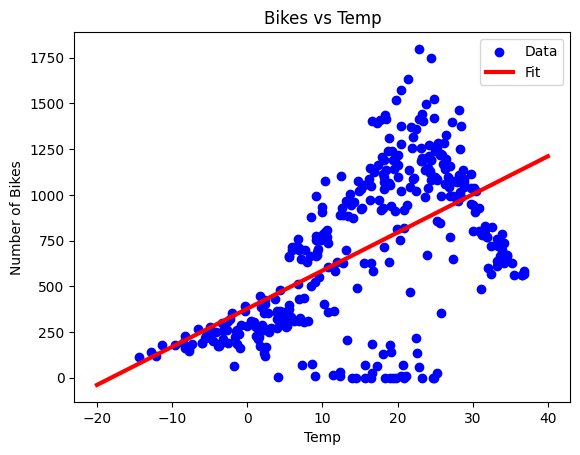

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color= "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color ="red", linewidth=3)
plt.legend()
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.title("Bikes vs Temp")
plt.show()

# Multiple Linear Regression

In [ ]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df)) ])
_, X_train_all, y_train_all = get_xy(df, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(df, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(df, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.48323001842092683

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_lr

array([[ 422.15268316],
       [ 461.8463628 ],
       [ 230.36633279],
       [ 396.98152135],
       [ 216.51853951],
       [ 404.02426821],
       [ 361.41486951],
       [ 379.77093057],
       [ 428.83656215],
       [ 100.30196202],
       [ 346.06619596],
       [ 281.4250703 ],
       [ 316.56289912],
       [ 262.43172043],
       [ 249.94381559],
       [ 340.19099453],
       [ 324.99868371],
       [ -28.5613801 ],
       [ 340.10574898],
       [ 225.59197814],
       [ 397.74882921],
       [ 374.50984845],
       [ 341.02767   ],
       [-189.98498397],
       [ 390.88670155],
       [ 374.60196087],
       [ 306.27618453],
       [ 341.56197897],
       [ 323.90108358],
       [ 290.99861789],
       [ 392.51725385],
       [ 397.78152817],
       [ 389.6619317 ],
       [ 343.44077524],
       [ 336.88608042],
       [ 369.27993613],
       [ 400.75425984],
       [ 354.40979155],
       [ 378.36796094],
       [ 331.70458546],
       [ 294.06943376],
       [ 261.843

# Regression with Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=1)
])

In [ ]:
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose= 0,
    epochs= 1000,
    validation_data=(X_val_temp, y_val_temp)
)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

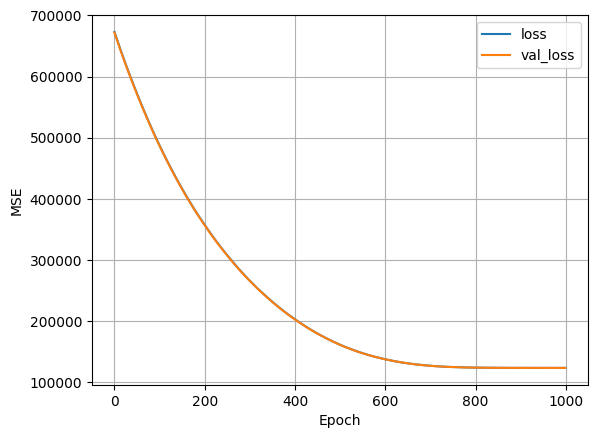

In [ ]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


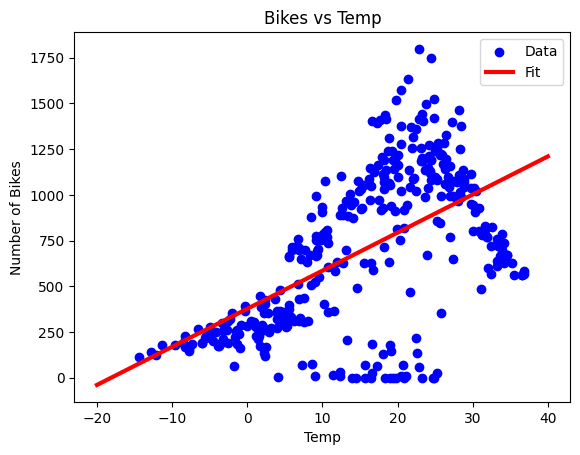

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color= "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color ="red", linewidth=3)
plt.legend()
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.title("Bikes vs Temp")
plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df)) ])
_, X_train_all, y_train_all = get_xy(df, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(df, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(df, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=[X_train_all.shape[1],], axis=None)
all_normalizer.adapt(X_train_all)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
all_nn_model = tf.keras.Sequential([
  all_normalizer,
  tf.keras.layers.Dense(units=1)
])

In [ ]:
all_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [ ]:
history = all_nn_model.fit(
    X_train_all, y_train_all,
    verbose= 0,
    epochs= 1000,
    validation_data=(X_val_all, y_val_all)
)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

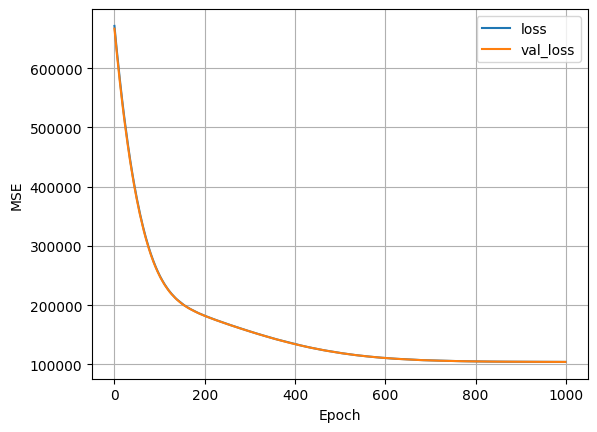

In [ ]:
plot_loss(history)

# Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp)
nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=32, activation="relu"),
  tf.keras.layers.Dense(units=32, activation="relu"),
  tf.keras.layers.Dense(units=1)
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    verbose= 0,
    epochs= 100,
    validation_data=(X_val_temp, y_val_temp)
)

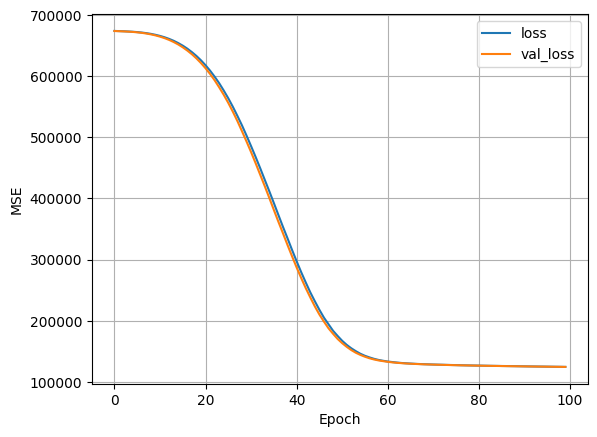

In [ ]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


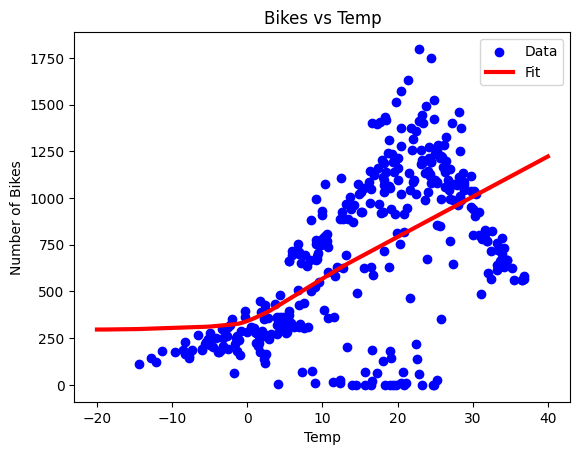

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label = "Data", color= "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color ="red", linewidth=3)
plt.legend()
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.title("Bikes vs Temp")
plt.show()

In [ ]:
# cal
y_pred_lr = all_reg.predict(X_test_all)

In [ ]:
y_pred_nn = all_nn_model.predict(X_test_all)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
def MSE(y_pred, y_real):
  return np.square(y_pred - y_real).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)

np.float64(95616.74056812628)

In [ ]:
MSE(y_pred_nn, y_test_all)

np.float64(104143.60495294475)

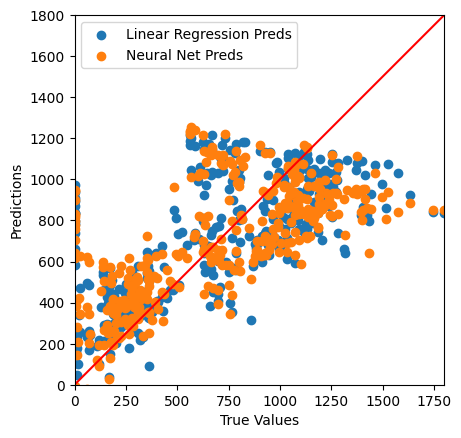

In [ ]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label = "Linear Regression Preds")
plt.scatter(y_test_all, y_pred_nn, label = "Neural Net Preds")
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c= "red")
plt.show()